# Libraries

In [36]:
import geopandas as gpd
import pandas as pd
from shapely import wkt
import json
import pandas as pd
import osmnx as ox
import matplotlib.pyplot as plt
import osmnx as ox
import networkx as nx
import GOSTnets as gn
import numpy as np

# Mapa Cusco

In [ ]:
perushape = gpd.read_file("../../Turismo/shapes/peru.shp")
perushape.head()

In [ ]:

# cuscoshape = perushape[perushape['provincia'].isin(['CUSCO', 'QUISPICANCHI'])]
cuscoshape = perushape[perushape['provincia'].isin(['CUSCO'])]

cuscoshape.head()

<AxesSubplot:>

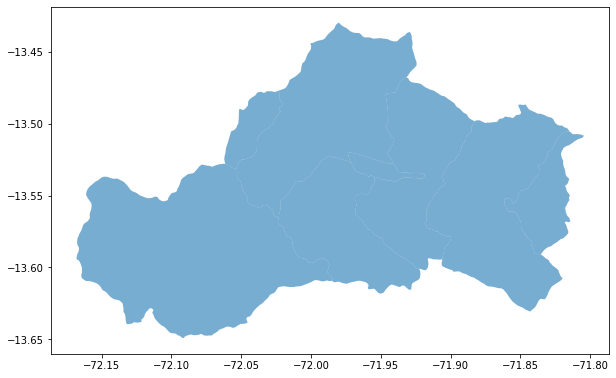

In [64]:
fig, ax = plt.subplots(figsize = (10,10))

cuscoshape.plot(alpha=0.6, ax=ax, column='provincia')
# gdf.plot(ax=ax)

In [ ]:
mask = perushape['departamen'] == 'CUSCO'

print(np.sort(list(perushape[mask]['provincia'].unique())))

print(np.sort(list(perushape[mask]['distrito'].unique())))

# Grafo Cusco

In [52]:
%%time

place_name = ["Provincia de Cusco, Cusco, Peru"]
graph = ox.graph_from_place(place_name, which_result=1, network_type='drive')

CPU times: user 38.8 s, sys: 292 ms, total: 39.1 s
Wall time: 1min 44s


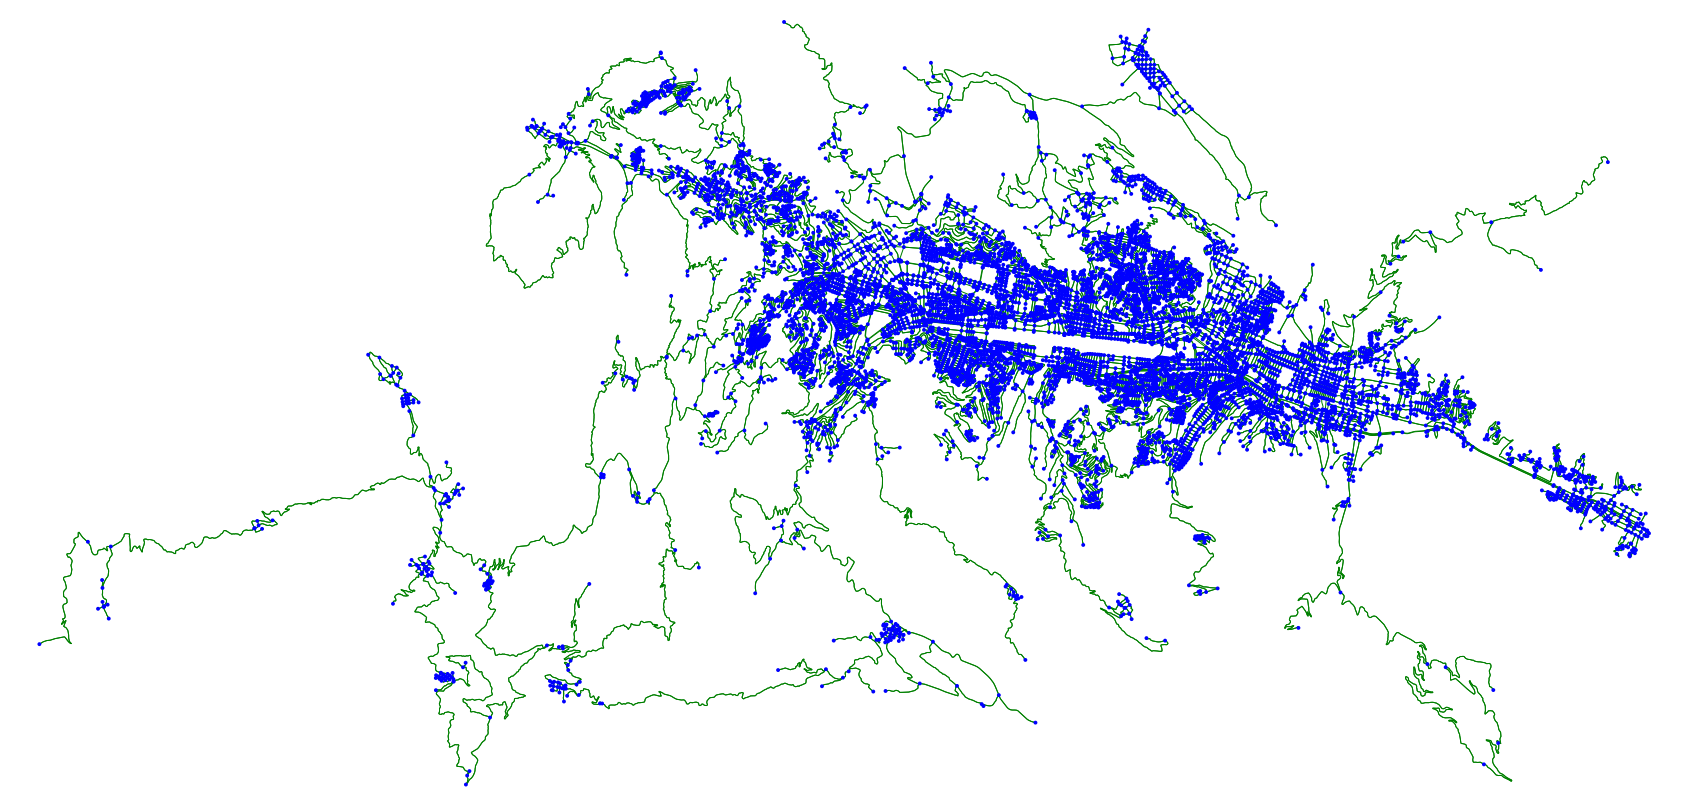

In [53]:
fig, ax = ox.plot_graph(graph, bgcolor='white', node_color='blue', edge_color='green', figsize=(30,30))

In [ ]:
nodes, edges = ox.graph_to_gdfs(graph)

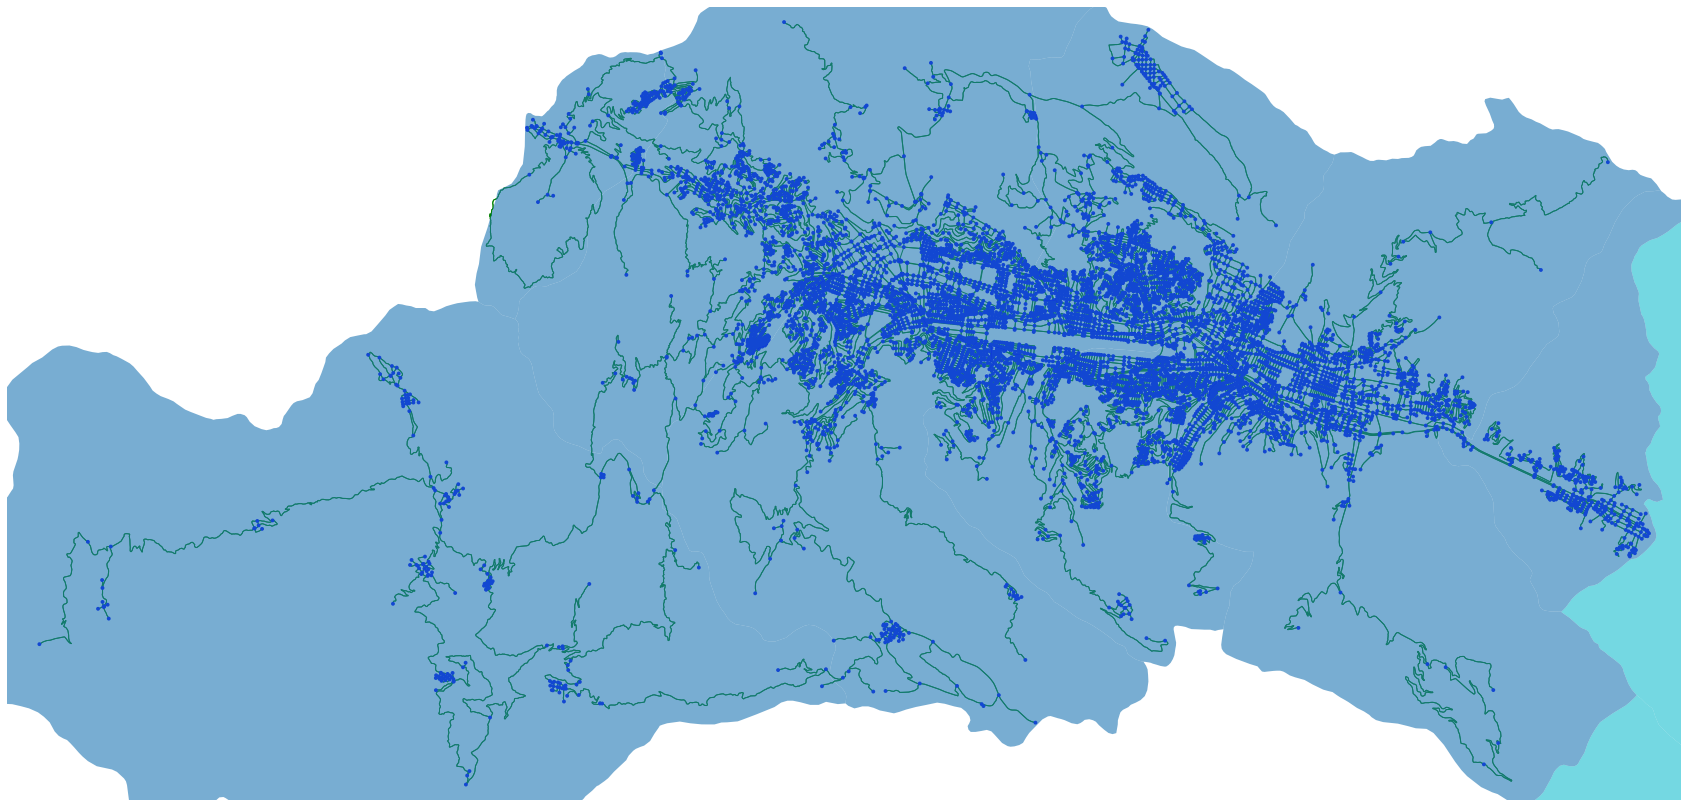

In [55]:
fig

# RutasCusco

In [37]:
rutascusco = pd.read_csv("RutasCusco.csv")
rutascusco.head()

latitud  longitud direccion ruta
0 -13.5408  -71.8866         s  c4m
1 -13.5407  -71.8868         s  c4m
2 -13.5407  -71.8872         s  c4m
3 -13.5412  -71.8875         s  c4m
4 -13.5418  -71.8877         s  c4m

In [71]:
rutascusco = gpd.GeoDataFrame(
    rutascusco, geometry = gpd.points_from_xy(rutascusco.longitud, rutascusco.latitud), crs="EPSG:4326"
)
rutascusco.head()

latitud  longitud direccion ruta                     geometry
0 -13.5408  -71.8866         s  c4m  POINT (-71.88660 -13.54080)
1 -13.5407  -71.8868         s  c4m  POINT (-71.88680 -13.54070)
2 -13.5407  -71.8872         s  c4m  POINT (-71.88720 -13.54070)
3 -13.5412  -71.8875         s  c4m  POINT (-71.88750 -13.54120)
4 -13.5418  -71.8877         s  c4m  POINT (-71.88770 -13.54180)

<AxesSubplot:>

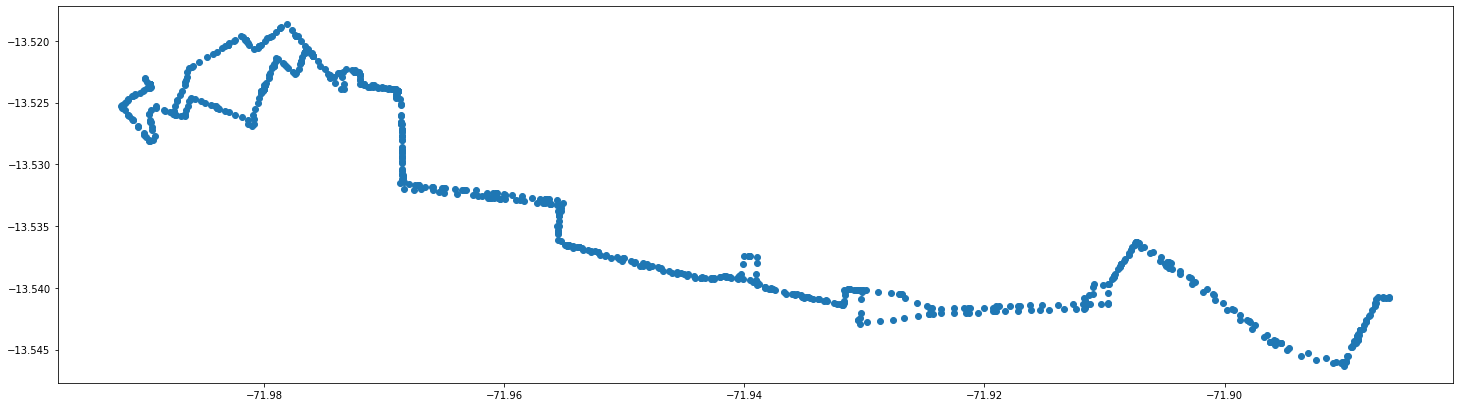

In [77]:
fig, ax = plt.subplots(figsize=(25,25))
rutas = ['c4m']
rutascusco.query('ruta in @rutas').plot(ax=ax)

In [100]:
cusco_transporte = rutascusco.dissolve(by='ruta').reset_index()
cusco_transporte

ruta  \
0                      Arcoiris   
1                        Batman   
2                      Columbia   
3                  Correcaminos   
4                        Dorado   
5                     El Chaski   
6         Expreso San Sebastian   
7              Expreso Santiago   
8                 Expreso Zorro   
9                      Huancaro   
10                     Imperial   
11                Inkas Express   
12  Leon San Jeronimo - Naranja   
13                   Los Leones   
14                 Nueva Chaska   
15                Nuevo Mirador   
16                   Pachacutec   
17          Patron San Jeronimo   
18                   Santa Cruz   
19                     Satelite   
20                       Saylla   
21              Servicio Andino   
22                Sr del Huerto   
23             Sr. de Wimpillay   
24               Sr. del Huerto   
25              Ttio la Florida   
26                  Tupac Amaru   
27                       Yllari   
28                          c4m   

                                             geometry    latitud   longitud  \
0   MULTIPOINT (-71.99335 -13.53147, -71.99331 -13... -13.534224 -71.989920   
1   MULTIPOINT (-71.99190 -13.50995, -71.99190 -13... -13.528130 -71.896730   
2   MULTIPOINT (-71.98227 -13.54352, -71.98227 -13... -13.517214 -71.950930   
3   MULTIPOINT (-71.99360 -13.51980, -71.99340 -13... -13.553500 -71.880200   
4   MULTIPOINT (-71.99489 -13.53126, -71.99485 -13... -13.554377 -71.878624   
5   MULTIPOINT (-71.98341 -13.52482, -71.98341 -13... -13.544370 -71.940970   
6   MULTIPOINT (-71.99720 -13.52320, -71.99720 -13... -13.557900 -71.913800   
7   MULTIPOINT (-72.00742 -13.50361, -72.00742 -13... -13.498031 -72.006990   
8   MULTIPOINT (-71.99560 -13.51750, -71.99550 -13... -13.510500 -71.992700   
9   MULTIPOINT (-71.98634 -13.54541, -71.98634 -13... -13.545406 -71.986340   
10  MULTIPOINT (-71.97614 -13.51681, -71.97613 -13... -13.548660 -71.888270   
11  MULTIPOINT (-71.99120 -13.55180, -71.99110 -13... -13.551400 -71.986900   
12  MULTIPOINT (-72.00280 -13.50650, -72.00270 -13... -13.547700 -71.867000   
13  MULTIPOINT (-71.98414 -13.51160, -71.98412 -13... -13.511598 -71.984140   
14  MULTIPOINT (-71.99797 -13.52841, -71.99794 -13... -13.528384 -71.997894   
15  MULTIPOINT (-71.98900 -13.55050, -71.98861 -13... -13.544597 -71.981900   
16  MULTIPOINT (-72.04610 -13.49470, -72.04600 -13... -13.494700 -72.046000   
17  MULTIPOINT (-71.99160 -13.55600, -71.99140 -13... -13.554900 -71.856200   
18  MULTIPOINT (-71.98720 -13.52240, -71.98700 -13... -13.594600 -71.763300   
19  MULTIPOINT (-72.01780 -13.50300, -72.01780 -13... -13.502800 -72.017700   
20  MULTIPOINT (-71.98688 -13.54437, -71.98680 -13... -13.544200 -71.986694   
21  MULTIPOINT (-72.00597 -13.50774, -72.00574 -13... -13.507738 -72.005970   
22  MULTIPOINT (-71.97641 -13.50997, -71.97641 -13... -13.485790 -71.946200   
23  MULTIPOINT (-71.97390 -13.51970, -71.97390 -13... -13.540800 -71.887000   
24  MULTIPOINT (-71.97637 -13.51017, -71.97635 -13... -13.542838 -71.960870   
25  MULTIPOINT (-71.98890 -13.51630, -71.98880 -13... -13.541500 -71.880000   
26  MULTIPOINT (-71.98367 -13.52533, -71.98367 -13... -13.542279 -71.961790   
27  MULTIPOINT (-71.98698 -13.53673, -71.98697 -13... -13.543035 -71.923874   
28  MULTIPOINT (-71.99190 -13.52530, -71.99180 -13... -13.540800 -71.886600   

   direccion  
0          s  
1          s  
2          s  
3          s  
4          s  
5          s  
6          s  
7          b  
8          b  
9          s  
10         s  
11         b  
12         s  
13         b  
14         s  
15         b  
16         b  
17         s  
18         s  
19         b  
20         b  
21         b  
22         s  
23         s  
24         s  
25         s  
26         b  
27         s  
28         s

<AxesSubplot:>

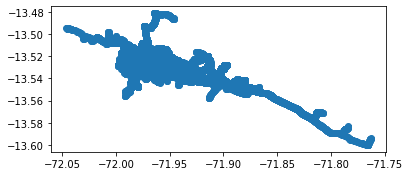

In [101]:
cusco_transporte.plot()

<AxesSubplot:>

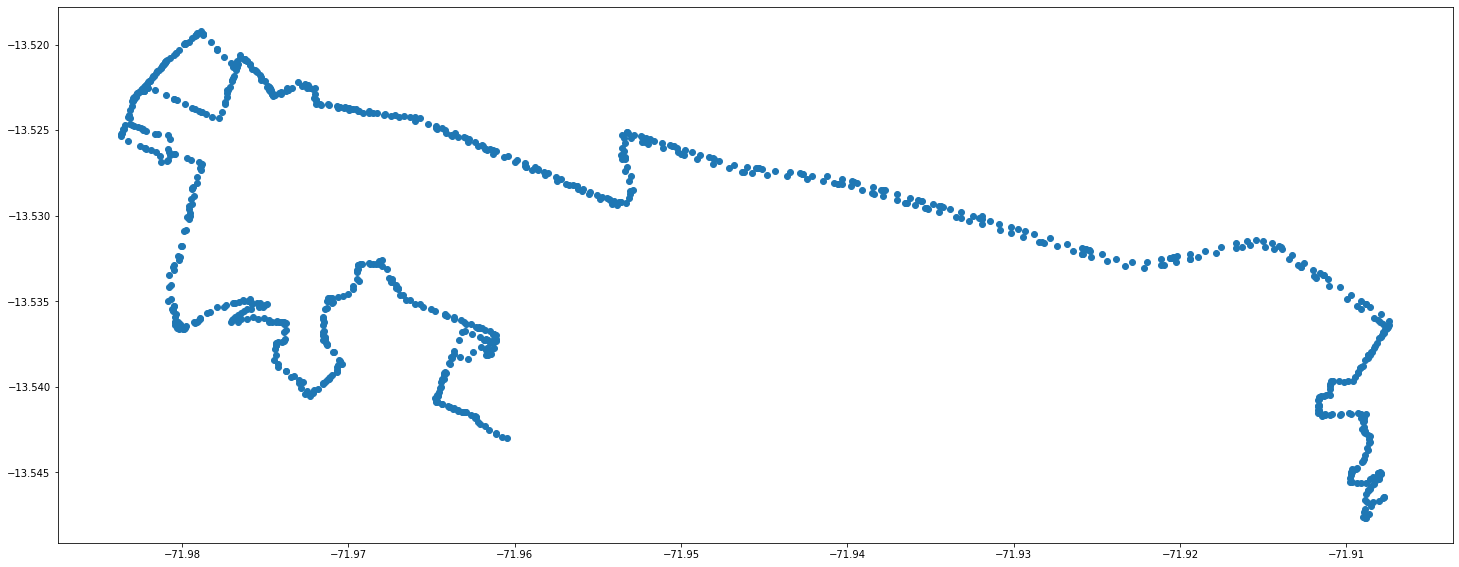

In [107]:
fig, ax = plt.subplots(figsize=(25,25))
rutas = ['Tupac Amaru']
cusco_transporte.query('ruta in @rutas').plot(ax=ax)

In [78]:
import plotly.express as px

In [105]:
geo_df

ruta                                           geometry  latitud  longitud  \
28  c4m  MULTIPOINT (-71.99190 -13.52530, -71.99180 -13... -13.5408  -71.8866   

   direccion  
28         s

In [109]:
%%time
geo_df = cuscoshape
fig = px.choropleth(geo_df, 
                    geojson=geo_df.geometry, 
                    locations=geo_df.index,
                    color='distrito'
                   )
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

fig.show()

CPU times: user 1.65 s, sys: 10.4 ms, total: 1.66 s
Wall time: 1.66 s


In [85]:
import plotly.express as px
import geopandas as gpd

df = px.data.election()
geo_df = gpd.GeoDataFrame.from_features(
    px.data.election_geojson()["features"]
).merge(df, on="district").set_index("district")


In [87]:
geo_df

geometry  \
district                                                                                                
11-Sault-au-Récollet                                MULTIPOLYGON (((-73.63632 45.57592, -73.63628 ...   
12-Saint-Sulpice                                    POLYGON ((-73.62175 45.55448, -73.62350 45.553...   
13-Ahuntsic                                         POLYGON ((-73.65132 45.55457, -73.65687 45.545...   
14-Bordeaux-Cartierville                            POLYGON ((-73.70430 45.54419, -73.70421 45.543...   
21-Ouest                                            POLYGON ((-73.55769 45.59322, -73.56942 45.597...   
22-Est                                              POLYGON ((-73.54528 45.59596, -73.54910 45.597...   
23-Centre                                           POLYGON ((-73.55769 45.59322, -73.55646 45.595...   
31-Darlington                                       POLYGON ((-73.62076 45.51390, -73.62366 45.510...   
32-Côte-des-Neiges                                  POLYGON ((-73.59561 45.50406, -73.59414 45.503...   
33-Snowdon                                          POLYGON ((-73.64581 45.50163, -73.64804 45.499...   
34-Notre-Dame-de-Grâce                              POLYGON ((-73.61436 45.48359, -73.61240 45.482...   
35-Loyola                                           POLYGON ((-73.61570 45.46329, -73.61824 45.462...   
41-du Canal                                         POLYGON ((-73.68278 45.46357, -73.68090 45.462...   
42-J.-Émery-Provost                                 POLYGON ((-73.69224 45.43975, -73.69306 45.445...   
43-Fort-Rolland                                     POLYGON ((-73.69297 45.44796, -73.69306 45.445...   
51-Sault-Saint-Louis                                MULTIPOLYGON (((-73.58789 45.42147, -73.58637 ...   
52-Cecil-P.-Newman                                  POLYGON ((-73.63735 45.41543, -73.63985 45.415...   
61-Pierre-Foretier                                  POLYGON ((-73.86890 45.48824, -73.87160 45.490...   
62-Denis-Benjamin-Viger                             POLYGON ((-73.87160 45.49057, -73.87581 45.494...   
63-Jacques-Bizard                                   MULTIPOLYGON (((-73.87618 45.48446, -73.87486 ...   
64-Sainte-Geneviève                                 MULTIPOLYGON (((-73.87953 45.47217, -73.87703 ...   
71-Tétreaultville                                   POLYGON ((-73.50585 45.59151, -73.51034 45.592...   
72-MaisonneuveLongue-Pointe                         POLYGON ((-73.50585 45.59151, -73.50523 45.591...   
73-Hochelaga                                        POLYGON ((-73.52692 45.54945, -73.52896 45.547...   
74-Louis-Riel                                       POLYGON ((-73.54550 45.59563, -73.54236 45.594...   
81-Marie-Clarac                                     POLYGON ((-73.62024 45.59512, -73.62962 45.583...   
82-Ovide-Clermont                                   POLYGON ((-73.60289 45.61122, -73.60411 45.610...   
91-Claude-Ryan                                      POLYGON ((-73.59899 45.51604, -73.59866 45.516...   
92-Joseph-Beaubien                                  POLYGON ((-73.59899 45.51604, -73.60447 45.515...   
93-Robert-Bourassa                                  POLYGON ((-73.59561 45.50406, -73.59878 45.505...   
94-Jeanne-Sauvé                                     POLYGON ((-73.61796 45.51217, -73.61766 45.512...   
101-Bois-de-Liesse                                  MULTIPOLYGON (((-73.81877 45.51408, -73.81824 ...   
102-Cap-Saint-Jacques                               MULTIPOLYGON (((-73.84617 45.48899, -73.85053 ...   
111-Mile-End                                        POLYGON ((-73.57920 45.52801, -73.58151 45.525...   
113-Jeanne-Mance                                    POLYGON ((-73.57348 45.50497, -73.58011 45.508...   
121-La Pointe-aux-Prairies                          POLYGON ((-73.48690 45.66682, -73.49093 45.667...   
122-Pointe-aux-Trembles                             POLYGON ((-73.54474 45.64822, -73.54419 45.648...  

In [ ]:

fig = px.choropleth(geo_df,
                   geojson=geo_df.geometry,
                   locations=geo_df.index,
                   color="Joly",
                   projection="mercator")
fig.update_geos(fitbounds="locations", visible=False)
fig.show()

In [88]:
rutascusco

latitud   longitud direccion      ruta                     geometry
0     -13.540800 -71.886600         s       c4m  POINT (-71.88660 -13.54080)
1     -13.540700 -71.886800         s       c4m  POINT (-71.88680 -13.54070)
2     -13.540700 -71.887200         s       c4m  POINT (-71.88720 -13.54070)
3     -13.541200 -71.887500         s       c4m  POINT (-71.88750 -13.54120)
4     -13.541800 -71.887700         s       c4m  POINT (-71.88770 -13.54180)
...          ...        ...       ...       ...                          ...
50468 -13.544040 -71.985146         b  Huancaro  POINT (-71.98515 -13.54404)
50469 -13.544587 -71.985600         b  Huancaro  POINT (-71.98560 -13.54459)
50470 -13.545175 -71.986145         b  Huancaro  POINT (-71.98614 -13.54518)
50471 -13.545370 -71.986340         b  Huancaro  POINT (-71.98634 -13.54537)
50472 -13.545370 -71.986340         b  Huancaro  POINT (-71.98634 -13.54537)

[50473 rows x 5 columns]

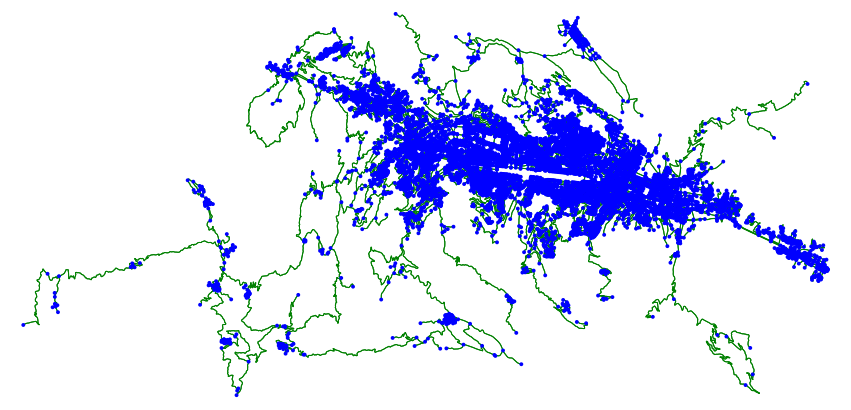

CPU times: user 20.8 s, sys: 295 ms, total: 21.1 s
Wall time: 20.6 s


<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

In [68]:
%%time
fig, ax = plt.subplots(figsize=(15,15))

fig, ax = ox.plot_graph(graph, ax=ax, bgcolor='white', node_color='blue', edge_color='green')
cuscoshape.plot(alpha=0.6, ax=ax, column='provincia')
gdf.plot(ax=ax, color='red')

# fig

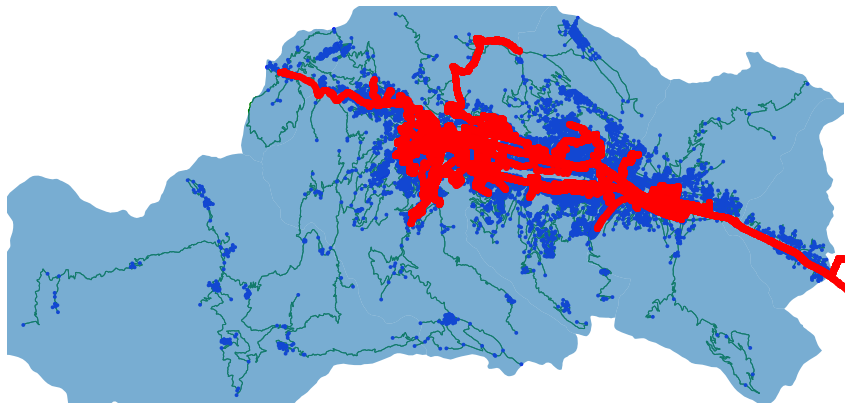

In [69]:
fig

# WazeRoutCalculator

In [42]:
import WazeRouteCalculator
import logging

logger = logging.getLogger('WazeRouteCalculator.WazeRouteCalculator')
logger.setLevel(logging.DEBUG)
handler = logging.StreamHandler()
logger.addHandler(handler)

from_address = 'Budapest, Hungary'
to_address = 'Gyor, Hungary'
region = 'EU'
route = WazeRouteCalculator.WazeRouteCalculator(from_address, to_address, region)
route.calc_route_info()

From: Budapest, Hungary - to: Gyor, Hungary
Start coords: (47.467660814, 19.077617881)
End coords: (47.67936706542969, 17.707035064697266)
Time 68.93 minutes, distance 118.27 km.


(68.93333333333334, 118.269)

In [43]:
gdf

latitud   longitud direccion      ruta                     geometry
0     -13.540800 -71.886600         s       c4m  POINT (-71.88660 -13.54080)
1     -13.540700 -71.886800         s       c4m  POINT (-71.88680 -13.54070)
2     -13.540700 -71.887200         s       c4m  POINT (-71.88720 -13.54070)
3     -13.541200 -71.887500         s       c4m  POINT (-71.88750 -13.54120)
4     -13.541800 -71.887700         s       c4m  POINT (-71.88770 -13.54180)
...          ...        ...       ...       ...                          ...
50468 -13.544040 -71.985146         b  Huancaro  POINT (-71.98515 -13.54404)
50469 -13.544587 -71.985600         b  Huancaro  POINT (-71.98560 -13.54459)
50470 -13.545175 -71.986145         b  Huancaro  POINT (-71.98614 -13.54518)
50471 -13.545370 -71.986340         b  Huancaro  POINT (-71.98634 -13.54537)
50472 -13.545370 -71.986340         b  Huancaro  POINT (-71.98634 -13.54537)

[50473 rows x 5 columns]

In [49]:
from_address = '-12.082981, -77.051728'
to_address = '-12.108989395643071, -77.01606433234396'

route = WazeRouteCalculator.WazeRouteCalculator(from_address, to_address)
route.calc_route_info()

From: -12.082981, -77.051728 - to: -12.108989395643071, -77.01606433234396
Start coords: (-12.082981, -77.051728)
End coords: (-12.108989395643071, -77.01606433234396)
Time 21.97 minutes, distance 7.29 km.


(21.966666666666665, 7.292)